In [90]:
import torch
import torchvision
import torch.nn.functional as F
import torch.nn as nn

import matplotlib.pyplot as plt
from tqdm import tqdm

## Loading the data

In [76]:
data_dir = './data'
train_set = torchvision.datasets.MNIST(root=data_dir, train=True, download=True)
test_set = torchvision.datasets.MNIST(root=data_dir, train=False, download=True)
train_input = train_set.data.view(-1, 1, 28, 28).float().div_(255.0)
train_target = train_set.targets
test_input = test_set.data.view(-1, 1, 28, 28).float().div_(255.0)
test_target = test_set.targets

print(f'train_input size: {train_input.size()}')
print(f'train_target size: {train_target.size()}')
print(f'test_input size: {test_input.size()}')
print(f'test_target size: {test_target.size()}')

print()

print(f'train_input min/max: {train_input.min().item(), train_input.max().item()}')
print(f'train_target min/max: {train_target.min().item(), train_target.max().item()}')
print(f'test_input min/max: {test_input.min().item(), test_input.max().item()}')
print(f'test_target min/max: {test_target.min().item(), test_target.max().item()}')

train_input size: torch.Size([60000, 1, 28, 28])
train_target size: torch.Size([60000])
test_input size: torch.Size([10000, 1, 28, 28])
test_target size: torch.Size([10000])

train_input min/max: (0.0, 1.0)
train_target min/max: (0, 9)
test_input min/max: (0.0, 1.0)
test_target min/max: (0, 9)


## Exploratory Data Analysis

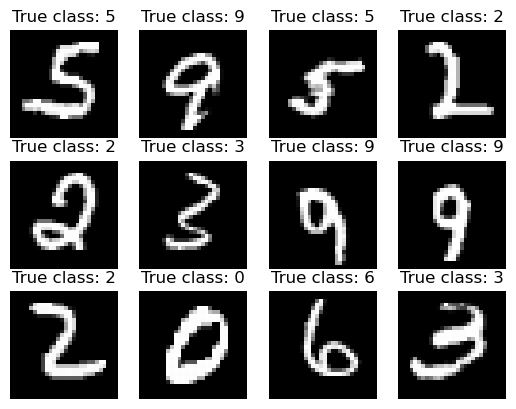

In [78]:
N_ROWS = 3
N_COLUMNS = 4

for i in range(1, N_ROWS * N_COLUMNS+1):
    plt.subplot(N_ROWS, N_COLUMNS, i)
    plt.axis('off')
    
    random_idx = torch.randint(len(train_input), size=(1,)).item()
    
    plt.imshow(train_input[random_idx, 0], cmap='gray')
    plt.title(f'True class: {train_target[random_idx]}')

## The model

In [ ]:
# check slides 5.3

In [84]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.fc1 = nn.Linear(256, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=3))
        x = F.relu(F.max_pool2d(self.conv2(x), kernel_size=2))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [86]:
lr = 1e-1
nb_epochs = 10
batch_size = 100

model = Net()

optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

# model
# criterion
# train_input, train_targets

mu, std = train_input.mean(), train_input.std()
train_input.sub_(mu).div_(std);

In [92]:
for e in tqdm(range(nb_epochs)):
    for input, targets in zip(train_input.split(batch_size),
                              train_target.split(batch_size)):
        output = model(input)
        loss = criterion(output, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

100%|██████████| 10/10 [05:20<00:00, 32.09s/it]


In [93]:
# how to save the model weights?
# how to properly evaluate the network?

In [95]:
y_pred = model(test_input)

In [113]:
def evaluate(y_pred, y_true):
    return (torch.argmax(y_pred, axis=1) == y_true).float().mean().item()    

evaluate(y_pred, test_target)

0.9894000291824341